# Clustering Algorithms Testing::

In [1]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm

from SUS.EM import EM
from SUS.kmeans import kernel_km
from SUS.kmeans import km_plusplus
from SUS.kmeans import kmeans
from SUS.kmeans import loss

In [2]:
def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [3]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

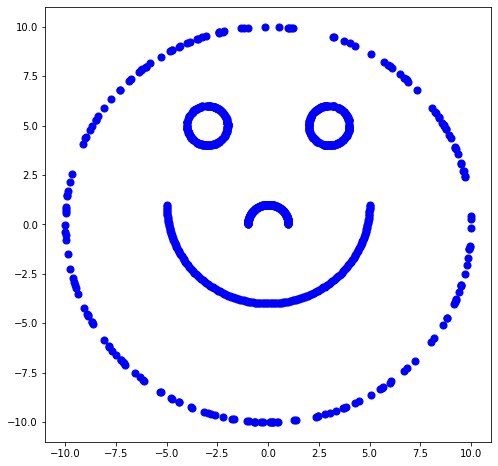

In [4]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

In [5]:
# plot function for gaussian kmean
def Plot_(X):
        n = X[0].__len__()
        color = iter(cm.rainbow(np.linspace(.3, 1, n+1)))
        fig = getFigure( 12, 12 )
        i=1

        for row in X[0]:
            m=np.vstack(row)
            col = next(color)
            plt.scatter(m[:,0],m[:,1],marker='o', color = col, s=100, edgecolor='black', label='cluster '+str(i))

            centroids = np.ravel(X[1][i-1])
            plt.scatter(centroids[0],centroids[1],marker='*', color = col ,edgecolor='black', s=300)
            i+=1
        plt.legend(scatterpoints=1)
        plt.grid()
        return 

## Expectation-Maximization:
Given parameters, $\Theta=\left\{\mu_{k}, \sigma_{k}^{2}\right\}{k=1}^{K}$ and $N$ data $X = (x_1, x-2\cdots ,x_n)$ iid. where $x_{n} \in \Re^{D}$

and the weight values are known, $$\pi_k = \pi_1, \pi_2, \cdots, \pi_k$$

Let, the corresponding latent variables, $Z = (z_1, z_2\cdot ,z_n)$


We know that for multivariate gaussian having spherical covarience is, $$N(x_i|\mu, \sigma^2 I_d) = \displaystyle\frac{1}{\sqrt{\sigma ^{2d}2\pi^d}}\exp(\displaystyle\frac{-1}{2\sigma^2}(x-\mu)^T(x-\mu))$$

Now,

1. Log Likelihod for the function would be, $$\log(P(X,Z|\Theta)) = \sum\limits_{n=1}^N\sum\limits_{k=1}^K z_{nk} \pi_k\log(N(x_i|\mu, \sigma^2 I_d))$$

### Estep
2. Using the baysian theorem, $$p\left(z_{n}=k \mid x_{n}, \hat{\Theta}\right) = \displaystyle\frac{p\left(z_{n}=k \mid \hat{\Theta}\right)p\left(x_{n} \mid z_{n}=k , \hat{\Theta}\right)}{\sum\limits_{k=1}^K p\left(x_{n} \mid z_{n}=k , \hat{\Theta}\right)}=\displaystyle\frac{\pi_k  N(x_i|\mu, \sigma^2 I_d)}{\sum\limits_{k=1}^K  \pi_k N(x_i|\mu, \sigma^2 I_d)}$$

     So, Expectation Step,$$E\left[z_{n k}\right]=\gamma_{n k}$$
     or. $$E\left[z_{n k}\right]=0 * p\left(z_{n k}=0 \mid x_{n}, \hat{\Theta}\right)+1 * p\left(z_{n k}=1 \mid x_{n}, \hat{\Theta}\right)$$
     or.$$E\left[z_{n k}\right]=\frac{\pi_{k} * N\left(x_{n} \mid \hat{\mu}{k}, \widehat{\sigma_{k}^{2}} I_{D}\right)}{\sum_{i=1}^{K} \pi_{i} * N\left(x_{n} \mid \widehat{\mu_{i}}, \widehat{\sigma_{i}^{2}} I_{D}\right)}$$

### MStep
3. Now for the optimum value of parameter, we take derivative w.r.t of $\mu$ and $\sigma$ and equate to zero, to find out the MLE estimation,
    
    so,$$\hat{\Theta}=\operatorname{argmax}{\Theta} E{p(Z \mid X, \hat{\Theta})}[\log (p(X, Z \mid \Theta))] =\operatorname{argmax}{\Theta} E{p(Z \mid X, \hat{\Theta})}\left[\sum_{n=1}^{N} \log \left(p\left(x_{n}, z_{n} \mid \Theta\right)\right)\right]$$
    
    we have, $$p\left(x_{n}, z_{n} \mid \Theta\right)=\sum_{k=1}^{K}\left(p\left(z_{n}=k \mid \Theta\right) * p\left(x_{n} \mid z_{n}=k, \Theta\right)\right)^{z_{n k}}$$
    
    where $z_{n k}=1$ when $x_{n}$ belongs to $k^{\text {th }}$ cluster, else $z_{n k}=0$
    
    so, $$\hat{\Theta}=\operatorname{argmax}{\Theta}\sum_{n=1}^{N} \sum_{k=1}^{K} z_{n k}[log \pi_{k}+\log N(x_{n} \mid \mu_{k}, \sigma_{k}^{2} I_{D})]$$
    
    using Expectation of $z_{n k}$
    $$\hat\Theta=\operatorname{argmax}{\Theta}\sum_{n=1}^{N}\sum_{k=1}^{K} E_{p\left(z_{n} \mid x_{n}, \hat{\Theta}\right)}\left[z_{n k}\right]\left[\log \pi_{k}+\log N\left(x_{n} \mid u_{k}, \sigma_{k}^{2} I_{D}\right)\right]$$
    or. $$\hat\Theta=\operatorname{argmax}{\Theta} \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma_{n k}\left[\log \pi_{k}+\log N\left(x_{n} \mid \mu_{k}, \sigma_{k}^{2} I_{D}\right)\right]$$
    or. $$\hat\Theta=\operatorname{argmax}{\Theta}\sum_{n=1}^{N}\sum_{k=1}^{K} \gamma_{n k}\left[\log \pi_{k}+\log \frac{1}{\sqrt{(2\pi)^{D}\left|\sigma_{k}^{2} I_{D}\right|}} \exp \left(-\frac{1}{2}\left(x_{n}-\mu_{k}\right)^{T} \frac{I_{D}}{\sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)\right)\right]$$
    
    or. $$\begin{array}{c}\hat\Theta=\operatorname{argmax}{\Theta} \sum_{n=1}^{N}
\sum_{k=1}^{K} \gamma_{n k}\left[\log \pi_{k}+\log \frac{1}{(2 \pi)^{D / 2}\left(\sigma_{k}^{2}\right)^{D / 2}} \exp \left(-\frac{1}{2}\left(x_{n}-\mu_{k}\right)^{T} \frac{I_{D}}{\sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)\right)\right]\end{array}$$

    or. $$
    \begin{array}{c}
\hat\Theta=\operatorname{argmax}{\Theta}\sum_{n=1}^{N}\sum_{k=1}^{K} \gamma_{n k}\left[\log \pi_{k}+-\frac{D}{2} \log (2 \pi)-\frac{D}{2} \log \left(\sigma_{k}^{2}\right)-\left(\frac{1}{2 \sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]\end{array}$$
    
4. MLE estimation w.r.t $\mu_{k}$,
    $$
    \frac{\partial \hat{\Theta}}{\partial \mu_{k}}=0
    $$
    All the terms not belonging to the cluster of the paramter under consideration will go to 0
    $$
    \begin{array}{c}
    \Longrightarrow \sum_{n=1}^{N} \gamma_{n k}\left[-\frac{\partial}{\partial \mu_{k}}\left(\frac{1}{2 \sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
    \Longrightarrow \sum_{n=1}^{N} \gamma_{n k}\left[-\left(\frac{\left(x_{n}-\mu_{k}\right)}{\sigma_{k}^{2}}\right)\right]=0
    \end{array}
    $$
    All the terms not belonging to the cluster of the paramter under consideration will go to 0
    $$
    \begin{aligned}
    \Longrightarrow \sum_{n=1}^{N} \gamma_{n k} &\left[-\frac{\partial}{\partial \mu_{k}}\left(\frac{1}{2 \sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
    \Longrightarrow & \sum_{n=1}^{N} \gamma_{n k}\left[-\left(\frac{\left(x_{n}-\mu_{k}\right)}{\sigma_{k}^{2}}\right)\right]=0 \\
    & \Longrightarrow \sum_{n=1}^{N}-\gamma_{n k}\left(x_{n}-\mu_{k}\right)=0 \\
    \Longrightarrow & \sum_{n=1}^{N}-\gamma_{n k} x_{n}+\sum_{n=1}^{N} \gamma_{n k} \mu_{k}=0 \\
    & \Longrightarrow \mu_{k} \sum_{n=1}^{N} \gamma_{n k}=\sum_{n=1}^{N} \gamma_{n k} x_{n} \\
    & \Longrightarrow \mu_{k}=\frac{\sum_{n=1}^{N} \gamma_{n k} x_{n}}{\sum_{n=1}^{N} \gamma_{n k}} \\
    & \Longrightarrow \mu_{k}=\frac{\sum_{n=1}^{N} \gamma_{n k} x_{n}}{N_{k}}
    \end{aligned}
    $$


5. MLE estimation for $\sigma^2_k$,
    $$
    \frac{\partial \hat{\Theta}}{\partial \sigma_{k}^{2}}=0
    $$
    All the terms not belonging to the cluster whose parameter is under consideration will go to 0,
    $$
    \begin{array}{c}
    \Longrightarrow \sum_{n=1}^{N} \gamma_{n k} \frac{\partial}{\partial \sigma_{k}^{2}}\left[-\frac{D}{2} \log \left(\sigma_{k}^{2}\right)-\left(\frac{1}{2 \sigma_{k}^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
    \Longrightarrow \sum_{n=1}^{N} \gamma_{n k}\left[-\frac{D}{2 \sigma_{k}^{2}}-\left(-\frac{1}{2\left(\sigma_{k}^{2}\right)^{2}}\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right)\right]=0 \\
    \Longrightarrow \sum_{n=1}^{N} \gamma_{n k}\left[D \sigma_{k}^{2}-\left(x_{n}-\mu_{k}\right)^{T} I_{D}\left(x_{n}-\mu_{k}\right)\right]=0 \\
    \Longrightarrow \sum_{n=1}^{N} \gamma_{n k} D \sigma_{k}^{2}=\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right) \\
    \Longrightarrow D \sigma_{k}^{2} \sum_{n=1}^{N} \gamma_{n k}=\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right) \\
    \Longrightarrow \sigma_{k}^{2}=\frac{\sum_{n=1}^{N} \gamma_{n k}\left(x_{n}-\mu_{k}\right)^{T}\left(x_{n}-\mu_{k}\right)}{N_{k} D}
    \end{array}
    $$
  #### The EM Algorithm proceeds as follows :


1. Initialization,$\operatorname{set} \Theta=\left\{\mu_{k}, \sigma_{k}^{2}\right\}_{k=1}^{K}$ as $\Theta^{0}$ and $t=0$


2. E-Step
$$
\begin{array}{c}
E\left[z_{n k}\right]=\gamma_{n k}=\frac{\pi_{k} * N\left(x_{n} \mid \mu_{k}^{t-1},\left(\sigma_{k}^{2}\right)^{t-1} I_{D}\right)}{\sum_{i=1}^{K} \pi_{i} * N\left(x_{n} \mid \mu_{k}^{t-1},\left(\sigma_{k}^{2}\right)^{t-1} I_{D}\right)} \\
N_{k}=\sum_{n=1}^{N} \gamma_{n k}
\end{array}
$$
3. M-Step
$$
\begin{array}{c}
\mu_{k}^{t}=\frac{\sum_{n=1}^{N} \gamma_{n k}^{t} x_{n}}{N_{k}^{t}} \\
\left(\sigma_{k}^{2}\right)^{t}=\frac{\sum_{n=1}^{N} \gamma_{n k}^{t}\left(x_{n}-\mu_{k}^{t}\right)^{T}\left(x_{n}-\mu_{k}^{t}\right)}{N_{k}^{t} D}
\end{array}
$$  
    

Model converges after 51 iteration


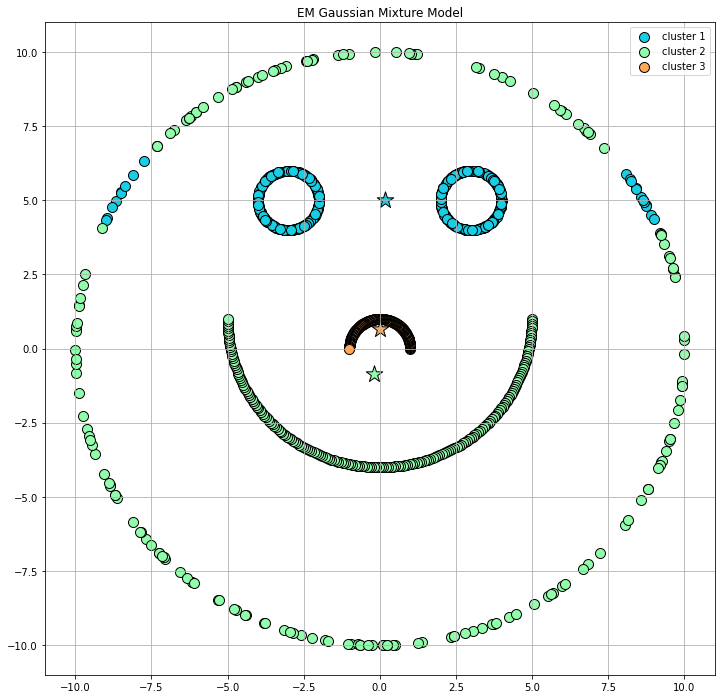

In [6]:
# Initialization of parameters
np.random.seed(4)
k = 3
chosen = np.random.choice(len(X), k, replace=False)
initial_means = [X[x] for x in chosen]
initial_covs = [np.cov(X, rowvar=0)] * k
initial_weights = [1/k] * k

# Run EM 
clusters = EM(X, initial_means, initial_covs, initial_weights)
#ploting the data
Plot_(clusters)
plt.title("EM Gaussian Mixture Model")
plt.show()

## KMean Clustering:
1. Initilize the no of cluster and the max itteration.
2. Initilize the centroids randomly.
3. Start itterating and find out the euclidean distance from the current cluster centroids $D = \sqrt{(x-\mu),(x-\mu)^T}$
4. Assign the features to its closest centroids.
5. Recalculate the new cluster means.
6. If the new cluster mean is equal to current cluster mean then break the process else go to step 3.

In [7]:
#function for ploting the results
def plot_(X,y,init_center):
        n = y[1].__len__()
        color = iter(cm.rainbow(np.linspace(.3, 1, n+1)))
        fig = getFigure( 12, 12)

        for i in range (len(y[1])):
            col = next(color)
            plt.scatter(X[y[0]==i,0],X[y[0]==i,1],marker='o', color = col, s=100,edgecolor='black', label='cluster '+str(i+1))
        
        plt.scatter(y[1][:,0],y[1][:,1],s=250, marker='*',c='red', edgecolor='black', label='centroids')
        plt.scatter(init_center[:,0],init_center[:,1],s=200, marker='+',c='black', label='initial centers')
        plt.legend(scatterpoints=1)
        plt.grid()
        return 

Model converges after 21 iteration


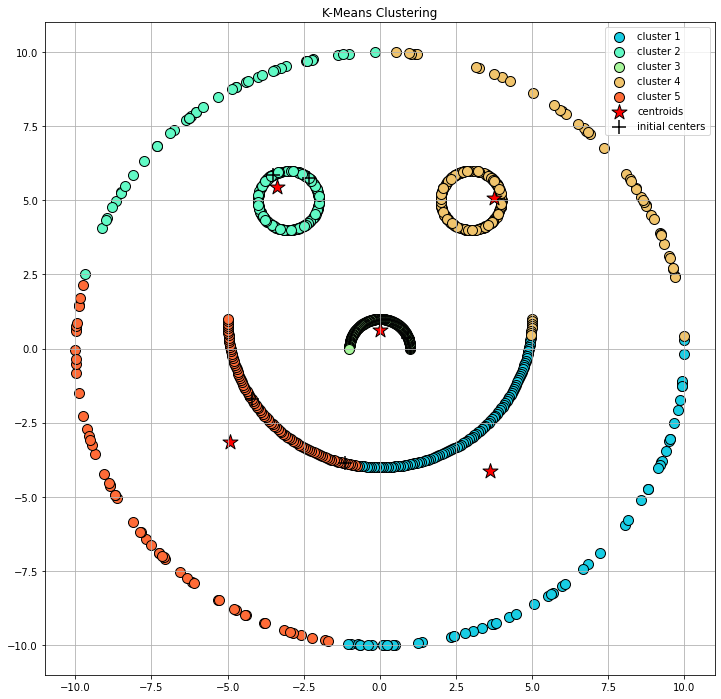

In [8]:
km = kmeans(n_clusters=5, max_iter=100) #fit the model
centroids = km.init_centroids(X)          #initilizing the parameters
y_means = km.fit_predict(X,centroids)       #train and test
print("Model converges after "+str(y_means[2])+" iteration")
plot_(X,y_means,centroids)                                  #plot the output
plt.title("K-Means Clustering")
plt.show()

## Kmean++ 
It is the extenson to the km where we find out the farthest pts to start the initilization which lead to fast convergence to the km algorithm.
1. Inititialize the parameters .
2. Pick a data randomly from the datasets.
3. Find out the squared distance from all the data points. And assign the closest cluster.
4. Choose the farthest points to assign as the cluster mean as the prob of a data point is to be assigned is directly proportional to its squated dist.
5. after k-1 itteration break the loop.

Model converges after 12 iteration


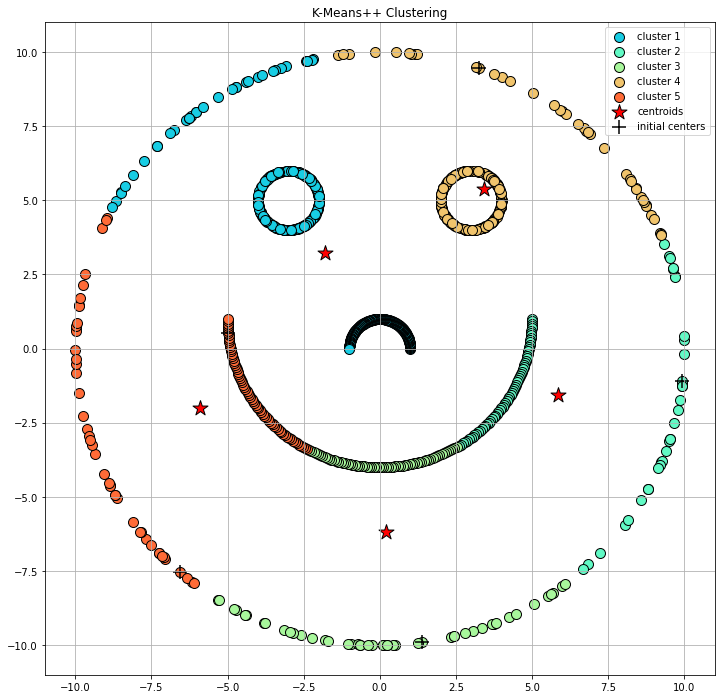

In [9]:
init_center = km_plusplus(X,5)  #km++ initilization to find the centroids
y_means = kmeans(n_clusters=5, max_iter=100).fit_predict(X,init_center) #fit model
plot_(X,y_means,init_center)                                             #plot the data uning the plot function
print("Model converges after "+str(y_means[2])+" iteration")
plt.title("K-Means++ Clustering")
plt.show()

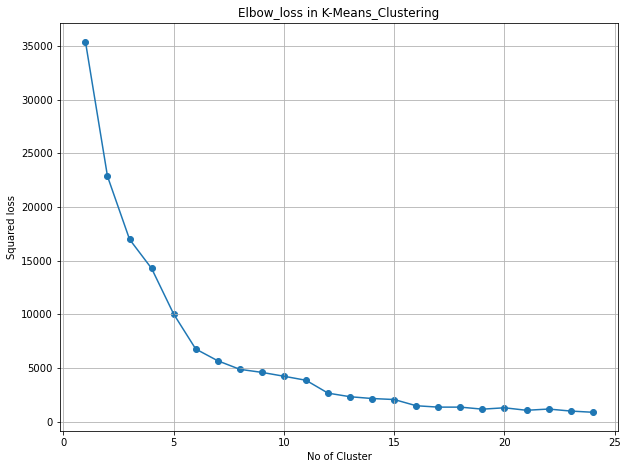

In [10]:
#ploting the result for k value ranging from 1 to 20
wcss=[]
K_range = range(1,25)
for k in K_range:
    z = loss(X,k)
    wcss.append(z)
fig = getFigure( 10, 7.5 )
plt.plot(np.arange(1,25), wcss)
plt.scatter(np.arange(1,25), wcss)
plt.xlabel("No of Cluster")
plt.ylabel("Squared loss")
plt.title("Elbow_loss in K-Means_Clustering")
plt.grid()
plt.show()

## RBF Kernal KMeans:

Model converges after 3 iteration


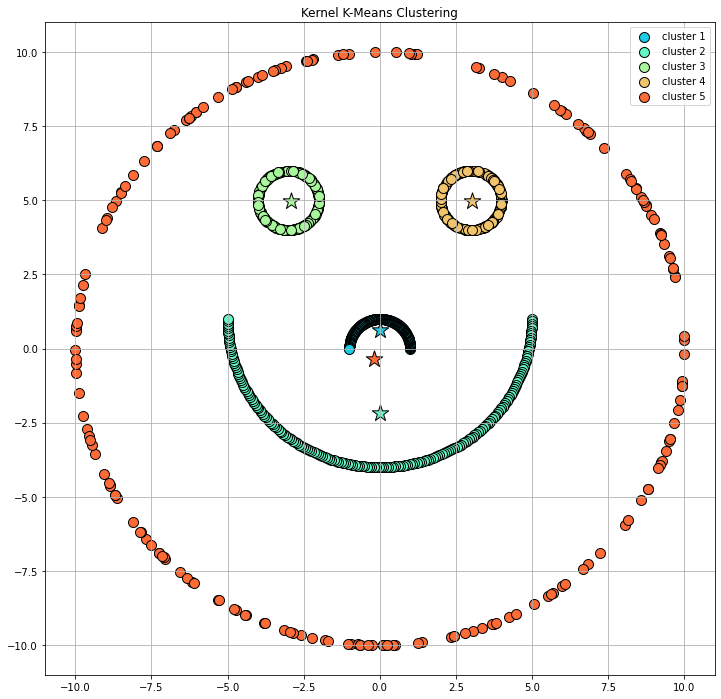

In [11]:
z=kernel_km(k=5, var=3).fit_predict(X)  #fit and train the data
Plot_(z)                                #plot the data
plt.title("Kernel K-Means Clustering")
plt.show()